In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
asset_returns = pd.read_csv("/content/asset_returns.csv", index_col=0, parse_dates=True)

markowitz_weights = pd.read_csv("/content/markowits_weights.csv", index_col=0)
sim_weights_df = pd.read_csv("/content/sim_vs_markowitz_weights.csv", index_col=0)

In [4]:
rf=.05

In [9]:
def portfolio_returns(weights, returns):
  return returns @ weights

In [12]:
markowitz_weights["MVP"]

,MVP
HDFCBANK.NS,0.334420
ICICIBANK.NS,0.041839
INFY.NS,0.126029
RELIANCE.NS,0.159182
TCS.NS,0.338530


In [11]:
markowitz_mvp_ret = portfolio_returns(
    markowitz_weights["MVP"],
    asset_returns
)

markowitz_mvp_ret

,0
Date,
2018-01-03,-0.002266
2018-01-04,0.003849
2018-01-05,0.004577
2018-01-08,0.006657
2018-01-09,0.002431
...,...
2023-12-22,0.002010
2023-12-26,-0.000913
2023-12-27,0.008229


In [14]:
sim_mvp_ret = portfolio_returns(
    sim_weights_df["SIM_MVP"].values,
    asset_returns
)
sim_mvp_ret

,0
Date,
2018-01-03,-0.003135
2018-01-04,0.002987
2018-01-05,0.004678
2018-01-08,0.009502
2018-01-09,0.002478
...,...
2023-12-22,0.005547
2023-12-26,-0.003419
2023-12-27,0.008735


In [16]:
equal_weights = np.repeat(1/asset_returns.shape[1], asset_returns.shape[1])

equal_weight_ret = portfolio_returns(equal_weights, asset_returns)
equal_weight_ret

,0
Date,
2018-01-03,0.001005
2018-01-04,0.002024
2018-01-05,0.001621
2018-01-08,0.008183
2018-01-09,0.002619
...,...
2023-12-22,0.001676
2023-12-26,-0.001378
2023-12-27,0.008376


In [17]:
def annualized_return(returns):
    return np.mean(returns) * 252

In [18]:
def annualized_volatility(returns):
    return returns.std() * np.sqrt(252)

In [19]:
def sharpe_ratio(returns, rf=rf):
    return (annualized_return(returns) - rf) / annualized_volatility(returns)

In [20]:
def max_drawdown(returns):
    cumulative = (1 + returns).cumprod()
    peak = cumulative.cummax()
    drawdown = (cumulative - peak) / peak
    return drawdown.min()

In [22]:
performance = pd.DataFrame({
    "Annual Return": [
        annualized_return(markowitz_mvp_ret),
        annualized_return(sim_mvp_ret),
        annualized_return(equal_weight_ret)
    ],
    "Annual Volatility": [
        annualized_volatility(markowitz_mvp_ret),
        annualized_volatility(sim_mvp_ret),
        annualized_volatility(equal_weight_ret)
    ],
    "Sharpe Ratio": [
        sharpe_ratio(markowitz_mvp_ret),
        sharpe_ratio(sim_mvp_ret),
        sharpe_ratio(equal_weight_ret)
    ],
    "Max Drawdown": [
        max_drawdown(markowitz_mvp_ret),
        max_drawdown(sim_mvp_ret),
        max_drawdown(equal_weight_ret)
    ]
}, index=["Markowitz MVP", "SIM MVP", "Equal Weight"])
performance


,Annual Return,Annual Volatility,Sharpe Ratio,Max Drawdown
Markowitz MVP,0.172439,0.193481,0.632822,-0.364275
SIM MVP,0.181123,0.198057,0.662048,-0.341556
Equal Weight,0.185730,0.200134,0.678195,-0.393749


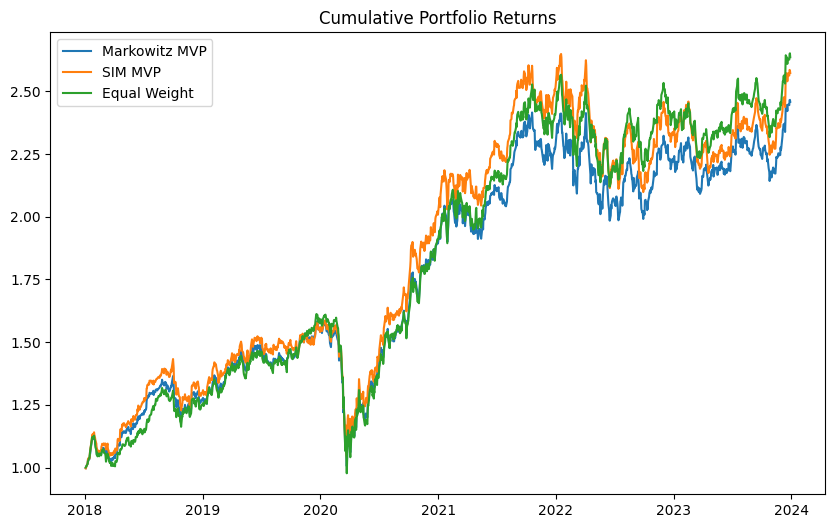

In [24]:
plt.figure(figsize=(10,6))
plt.plot((1 + markowitz_mvp_ret).cumprod(), label="Markowitz MVP")
plt.plot((1 + sim_mvp_ret).cumprod(), label="SIM MVP")
plt.plot((1 + equal_weight_ret).cumprod(), label="Equal Weight")
plt.legend()
plt.title("Cumulative Portfolio Returns")
plt.show()


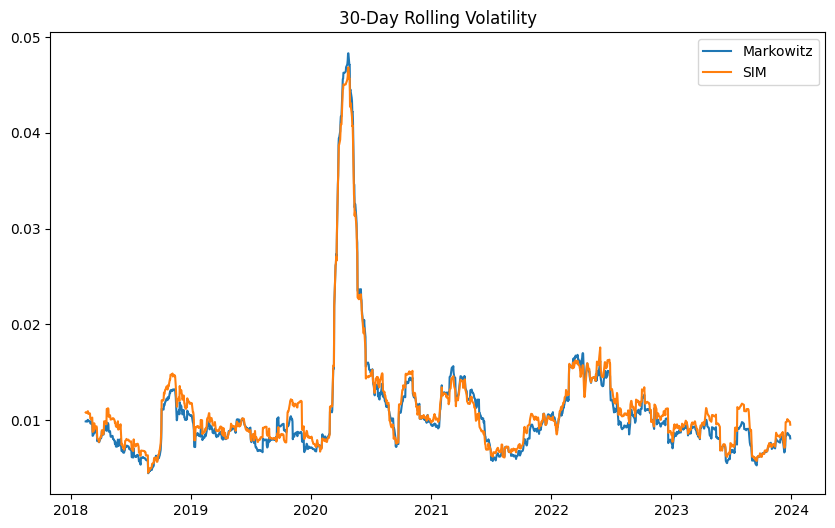

In [25]:
rolling_window = 30

plt.figure(figsize=(10,6))
plt.plot(markowitz_mvp_ret.rolling(rolling_window).std(), label="Markowitz")
plt.plot(sim_mvp_ret.rolling(rolling_window).std(), label="SIM")
plt.legend()
plt.title("30-Day Rolling Volatility")
plt.show()


In [26]:
performance

,Annual Return,Annual Volatility,Sharpe Ratio,Max Drawdown
Markowitz MVP,0.172439,0.193481,0.632822,-0.364275
SIM MVP,0.181123,0.198057,0.662048,-0.341556
Equal Weight,0.185730,0.200134,0.678195,-0.393749
